### Implement extreme learning machine (ELM) classifier for the classification. You can use Gaussian and tanh activation functions. Please select the training and test instances using 5-fold cross- validation technique Evaluate individual accuracy and overall accuracy. The dataset (data5.mat) contains 72 features and the last column is the output (class labels). (Packages such as keras, tensorflow, pytorch for python and MATLAB deep learning toolbox etc. are not allowed).

In [16]:
#import all the necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d
import scipy.io

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
root="/content/drive/MyDrive/NNFL_Assignment2/data5.mat"
data=scipy.io.loadmat(os.path.join(root))
data=data['x']
np.random.shuffle(data)
print((data.shape))


(2148, 73)


In [5]:
def onehoten(data):
    y=data[:,-1]
    cls=[]
    for insts in range(0,y.shape[0]):
        if y[insts] in cls:
            continue
        else:
            cls.append(y[insts])
    nclasses=len(cls)
    z=np.zeros([y.shape[0],2])
    for insts in range(0,y.shape[0]):
        z[insts,int(y[insts])]=z[insts,int(y[insts])]+1
    return z
        

In [6]:
def split_train_test(data,k):
    folds=np.array_split(data,k)
    return folds

In [7]:
def split_x_y(data):
    x=np.delete(data,-1,1)
    x=normalize(x)
    x=np.concatenate((x,np.ones((data.shape[0],1))),axis=1)
    y=onehoten(data)
    return x,y

In [8]:
def normalize(data):
    for i in range(data.shape[1]):
        temp=data[:,i]
        data[:,i]=(temp-np.mean(temp))/np.std(temp)
    return data

In [9]:
def tanh(x,a):
    act=(1-np.exp(-1*(np.dot(x,a))))/(1+np.exp(-1*(np.dot(x,a))))
    return act

In [24]:
def gaussian(x,a):
    return np.exp((-1*(np.dot(x,a))**2)

####With Tanh function

In [ ]:
#hidn is the number of hidden neurons
def ELM(data,hidn,k=5):
    folds=split_train_test(data,k)
    accs=[]
    sens=[]
    specs=[]
    confmats=[]
    for fold in range(0,k):
        train=[]
        for fld in range(0,k):
            if (fold==fld):
                test=folds[fold]
            else:
                train.append(folds[fold])
        train=np.array(train).reshape((int(data.shape[0]*(1-k)/k),data.shape[1]))
        try:
            test=np.array(test).reshape((430,data.shape[1]))
        except:
            test=np.array(test).reshape((429,data.shape[1]))
        x_train,y_train=split_x_y(train)
        x_test,y_test=split_x_y(test)
        w1=np.random.rand(x_train.shape[1],hidn)
        h=tanh(x_train,w1)
        htemp=np.concatenate((h,np.ones((h.shape[0],1))),axis=1)
        w2=np.dot(np.linalg.pinv(htemp),y_train)
#         now training is complete,testing part
        htest=tanh(x_test,w1)
        htest=np.concatenate((htest,np.ones((htest.shape[0],1))),axis=1)
        hpred=np.dot(htest,w2)

        h_test=np.rint(hpred[:,0]).reshape((test.shape[0],1))
        y_test=y_test[:,0].reshape((test.shape[0],1))
        error = (y_test-np.rint(h_test)).tolist()
        som = (y_test+np.rint(h_test)).tolist()
        FN = error.count([1.0])
        FP = error.count([-1.0])
        TN = som.count([0.0])
        TP = som.count([2.0])
        accuracy = (TP+TN)/(TP+TN+FP+FN)
        sensitivity = TP/(TP+FN)
        specificity = TN/(FP+TN)
        conf_matrix = np.array(([TP,FP],[FN,TN]))
        accs.append(accuracy)
        sens.append(sensitivity)
        specs.append(specificity)
        confmats.append(conf_matrix)

    return accs,sens,specs,confmats
            
            
    

In [ ]:
accs,sens,specs,confmats=ELM(data,400,5)

In [ ]:
print("Accuracies={}".format(accs))
print("Sensitivity={}".format(sens))
print("Specificity={}".format(specs))
for i in range(len(confmats)):
    print(confmats[i])

Accuracies=[0.9720930232558139, 0.9837209302325581, 0.9790697674418605, 0.9790209790209791, 0.972027972027972]
Sensitivity=[0.9955555555555555, 0.9681818181818181, 0.958139534883721, 0.958139534883721, 0.945]
Specificity=[0.9463414634146341, 1.0, 1.0, 1.0, 0.9956331877729258]
[[224  11]
 [  1 194]]
[[213   0]
 [  7 210]]
[[206   0]
 [  9 215]]
[[206   0]
 [  9 214]]
[[189   1]
 [ 11 228]]


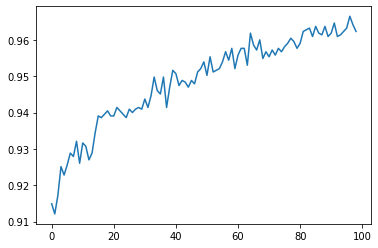

96

In [ ]:
#For fnding the optimum number of hidden neurons
totaccs=[]
for i in range(1,100):
    _,totacc=ELM(data,i*2,5)
    totaccs.append(totacc)
plt.plot(totaccs)
plt.show()
np.argmax(totaccs)
#according to the graph, it reaches 1 at a cretain value.but its computationaly time consuming.

####With Gaussian function

In [18]:
#hidn is the number of hidden neurons
#With Gaussian activation
def ELM(data,hidn,k=5):
    folds=split_train_test(data,k)
    accs=[]
    sens=[]
    specs=[]
    confmats=[]
    for fold in range(0,k):
        train=[]
        for fld in range(0,k):
            if (fold==fld):
                test=folds[fold]
            else:
                train.append(folds[fold])
        train=np.array(train).reshape((int(data.shape[0]*(1-k)/k),data.shape[1]))
        try:
            test=np.array(test).reshape((430,data.shape[1]))
        except:
            test=np.array(test).reshape((429,data.shape[1]))
        x_train,y_train=split_x_y(train)
        x_test,y_test=split_x_y(test)
        w1=np.random.rand(x_train.shape[1],hidn)
        h=gaussian(x_train,w1)
        htemp=np.concatenate((h,np.ones((h.shape[0],1))),axis=1)
        w2=np.dot(np.linalg.pinv(htemp),y_train)
#         now training is complete,testing part
        htest=gaussian(x_test,w1)
        htest=np.concatenate((htest,np.ones((htest.shape[0],1))),axis=1)
        hpred=np.dot(htest,w2)

        h_test=np.rint(hpred[:,0]).reshape((test.shape[0],1))
        y_test=y_test[:,0].reshape((test.shape[0],1))
        error = (y_test-np.rint(h_test)).tolist()
        som = (y_test+np.rint(h_test)).tolist()
        FN = error.count([1.0])
        FP = error.count([-1.0])
        TN = som.count([0.0])
        TP = som.count([2.0])
        accuracy = (TP+TN)/(TP+TN+FP+FN)
        sensitivity = TP/(TP+FN)
        specificity = TN/(FP+TN)
        conf_matrix = np.array(([TP,FP],[FN,TN]))
        accs.append(accuracy)
        sens.append(sensitivity)
        specs.append(specificity)
        confmats.append(conf_matrix)

    return accs,sens,specs,confmats
            
            
    

In [34]:
accus,senus,specus,confmatus=ELM(data,460,5)

In [35]:
print("Accuracies={}".format(accus))
print("Sensitivity={}".format(senus))
print("Specificity={}".format(specus))
for i in range(len(confmatus)):
    print(confmatus[i])

Accuracies=[0.9395348837209302, 0.9116279069767442, 0.9279069767441861, 0.9230769230769231, 0.9207459207459208]
Sensitivity=[0.8706467661691543, 1.0, 1.0, 1.0, 0.8425925925925926]
Specificity=[1.0, 0.8240740740740741, 0.845771144278607, 0.8457943925233645, 1.0]
[[175   0]
 [ 26 229]]
[[214  38]
 [  0 178]]
[[229  31]
 [  0 170]]
[[215  33]
 [  0 181]]
[[182   0]
 [ 34 213]]
